### IMPORTING LIBRARIES:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### IMPORTING OUR DATASET

In [3]:
paris = pd.read_csv('paris_weekends.csv')
paris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3558 entries, 0 to 3557
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  3558 non-null   int64  
 1   realSum                     3558 non-null   float64
 2   room_type                   3556 non-null   object 
 3   room_shared                 3556 non-null   object 
 4   room_private                3558 non-null   bool   
 5   person_capacity             3557 non-null   float64
 6   host_is_superhost           3556 non-null   object 
 7   multi                       3558 non-null   int64  
 8   biz                         3558 non-null   int64  
 9   cleanliness_rating          3558 non-null   float64
 10  guest_satisfaction_overall  3558 non-null   float64
 11  bedrooms                    3558 non-null   int64  
 12  dist                        3550 non-null   float64
 13  metro_dist                  3555 

In [4]:
paris.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,536.396682,Entire home/apt,False,False,5.0,False,0,1,9.0,89.0,1,1.351201,0.212346,390.776775,19.001549,1030.738507,47.550371,2.35900,48.86800
1,1,290.101594,Private room,False,True,2.0,True,0,0,10.0,97.0,1,0.699821,0.193710,518.478270,25.211044,1218.658866,56.219575,2.35385,48.86282
2,2,445.754497,Entire home/apt,False,False,4.0,False,0,1,10.0,100.0,1,0.968982,0.294343,432.689942,21.039580,1069.894793,49.356741,2.36023,48.86375
3,3,211.343089,Private room,False,True,2.0,False,0,0,10.0,94.0,1,3.302319,0.234740,444.555284,21.616533,902.856370,41.650870,2.31714,48.87475
4,4,266.334234,Entire home/apt,False,False,2.0,True,0,0,9.0,88.0,1,1.402430,0.055052,1013.458689,49.279502,1348.063511,62.189313,2.33408,48.85384


### FINDING ROWS WITH MISSING DATA:

In [5]:
missing_data = paris[paris.isnull().any(axis=1)]
print("Rows with missing data:")
print(missing_data)

Rows with missing data:
      Unnamed: 0     realSum        room_type room_shared  room_private  \
6              6  387.035138  Entire home/apt       False         False   
17            17  435.501911  Entire home/apt       False         False   
19            19  318.296207  Entire home/apt       False         False   
20            20  394.724578  Entire home/apt         NaN         False   
57            57  277.984901  Entire home/apt       False         False   
130          130  456.473110     Private room       False          True   
234          234  460.900364     Private room       False          True   
288          288  184.080529  Entire home/apt       False         False   
375          375  525.678069  Entire home/apt       False         False   
1824        1824  562.028148  Entire home/apt       False         False   
1826        1826  324.354553  Entire home/apt       False         False   
1838        1838  266.567248  Entire home/apt       False         False   
1

### DROPPING NULL AND UNNECESSARY VALUES

In [6]:
paris = paris.dropna()
paris 

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,536.396682,Entire home/apt,False,False,5.0,False,0,1,9.0,89.0,1,1.351201,0.212346,390.776775,19.001549,1030.738507,47.550371,2.35900,48.86800
1,1,290.101594,Private room,False,True,2.0,True,0,0,10.0,97.0,1,0.699821,0.193710,518.478270,25.211044,1218.658866,56.219575,2.35385,48.86282
2,2,445.754497,Entire home/apt,False,False,4.0,False,0,1,10.0,100.0,1,0.968982,0.294343,432.689942,21.039580,1069.894793,49.356741,2.36023,48.86375
3,3,211.343089,Private room,False,True,2.0,False,0,0,10.0,94.0,1,3.302319,0.234740,444.555284,21.616533,902.856370,41.650870,2.31714,48.87475
4,4,266.334234,Entire home/apt,False,False,2.0,True,0,0,9.0,88.0,1,1.402430,0.055052,1013.458689,49.279502,1348.063511,62.189313,2.33408,48.85384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3553,3553,295.460900,Entire home/apt,False,False,4.0,False,0,0,9.0,80.0,1,3.660389,0.168146,209.752453,10.199228,540.326583,24.926525,2.38051,48.88393
3554,3554,232.081275,Entire home/apt,False,False,4.0,False,0,0,10.0,98.0,1,3.558813,0.154703,185.486701,9.019304,474.351813,21.882955,2.40050,48.85093
3555,3555,223.925809,Entire home/apt,False,False,2.0,False,1,0,9.0,89.0,1,4.205205,0.253029,172.658919,8.395552,406.585935,18.756757,2.40100,48.87700
3556,3556,200.857489,Entire home/apt,False,False,2.0,True,0,0,9.0,93.0,1,2.891214,0.240674,235.167925,11.435057,602.451672,27.792500,2.38200,48.87400


In [7]:
paris = paris.drop(columns=['multi', 'biz'])
paris

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,536.396682,Entire home/apt,False,False,5.0,False,9.0,89.0,1,1.351201,0.212346,390.776775,19.001549,1030.738507,47.550371,2.35900,48.86800
1,1,290.101594,Private room,False,True,2.0,True,10.0,97.0,1,0.699821,0.193710,518.478270,25.211044,1218.658866,56.219575,2.35385,48.86282
2,2,445.754497,Entire home/apt,False,False,4.0,False,10.0,100.0,1,0.968982,0.294343,432.689942,21.039580,1069.894793,49.356741,2.36023,48.86375
3,3,211.343089,Private room,False,True,2.0,False,10.0,94.0,1,3.302319,0.234740,444.555284,21.616533,902.856370,41.650870,2.31714,48.87475
4,4,266.334234,Entire home/apt,False,False,2.0,True,9.0,88.0,1,1.402430,0.055052,1013.458689,49.279502,1348.063511,62.189313,2.33408,48.85384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3553,3553,295.460900,Entire home/apt,False,False,4.0,False,9.0,80.0,1,3.660389,0.168146,209.752453,10.199228,540.326583,24.926525,2.38051,48.88393
3554,3554,232.081275,Entire home/apt,False,False,4.0,False,10.0,98.0,1,3.558813,0.154703,185.486701,9.019304,474.351813,21.882955,2.40050,48.85093
3555,3555,223.925809,Entire home/apt,False,False,2.0,False,9.0,89.0,1,4.205205,0.253029,172.658919,8.395552,406.585935,18.756757,2.40100,48.87700
3556,3556,200.857489,Entire home/apt,False,False,2.0,True,9.0,93.0,1,2.891214,0.240674,235.167925,11.435057,602.451672,27.792500,2.38200,48.87400


In [8]:
paris.describe()

,Unnamed: 0,realSum,person_capacity,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,3534.000000,3534.000000,3534.000000,3534.000000,3534.000000,3534.000000,3534.000000,3534.000000,3534.000000,3534.000000,3534.000000,3534.000000,3534.000000,3534.000000
mean,1779.367006,387.245404,2.961800,9.274759,92.211375,0.976514,2.985816,0.226636,375.790386,18.272835,821.291143,37.888075,2.342751,48.864369
std,1024.807331,260.759287,1.207093,0.962090,8.672046,0.643953,1.455960,0.121244,159.820488,7.771283,282.400373,13.027788,0.033404,0.017403
min,0.000000,95.302451,2.000000,2.000000,20.000000,0.000000,0.071566,0.003220,116.297536,5.654976,258.674498,11.933258,2.248270,48.819940
25%,892.250000,240.935782,2.000000,9.000000,89.000000,1.000000,1.823003,0.141994,264.461856,12.859477,598.841584,27.625959,2.322195,48.852000
50%,1775.500000,315.150527,2.000000,10.000000,94.000000,1.000000,2.977343,0.207317,339.753044,16.520516,777.265074,35.857050,2.346125,48.865990
75%,2666.750000,461.133377,4.000000,10.000000,98.000000,1.000000,4.040633,0.290494,456.526815,22.198650,1032.656512,47.638853,2.366540,48.877997
max,3557.000000,4188.414577,6.000000,10.000000,100.000000,5.000000,7.680000,1.154771,2056.552199,100.000000,2167.677121,100.000000,2.438590,48.901060


### REMOVING OUTLIERS: 

In [9]:
z_scores = np.abs((paris['realSum'] - paris['realSum'].mean()) / paris['realSum'].std())
paris = paris[z_scores < 3] 

In [10]:
paris.describe()

,Unnamed: 0,realSum,person_capacity,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000
mean,1784.127445,366.111198,2.928941,9.268700,92.152186,0.954258,2.987603,0.226567,373.453136,18.159186,818.840821,37.775036,2.343038,48.864391
std,1023.361655,184.403666,1.179861,0.965153,8.702774,0.618126,1.453554,0.121397,157.582359,7.662454,281.633170,12.992395,0.033398,0.017479
min,0.000000,95.302451,2.000000,2.000000,20.000000,0.000000,0.071566,0.003220,116.297536,5.654976,258.674498,11.933258,2.248270,48.819940
25%,895.750000,240.528008,2.000000,9.000000,89.000000,1.000000,1.825736,0.141984,263.843684,12.829418,597.434130,27.561029,2.322588,48.851980
50%,1783.500000,312.936900,2.000000,9.000000,94.000000,1.000000,2.987068,0.207317,337.661018,16.418792,771.513684,35.591725,2.346465,48.866000
75%,2667.250000,446.686550,4.000000,10.000000,98.000000,1.000000,4.040280,0.290280,452.966821,22.025545,1030.522196,47.540392,2.366887,48.878082
max,3557.000000,1152.949949,6.000000,10.000000,100.000000,5.000000,7.680000,1.154771,2056.552199,100.000000,2167.677121,100.000000,2.438590,48.901060


In [11]:
room_type_distribution = paris['room_type'].value_counts()
print (room_type_distribution)

room_type
Entire home/apt    2668
Private room        761
Shared room          47
Name: count, dtype: int64


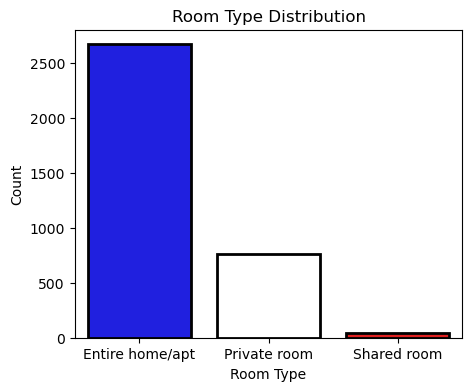

In [22]:
plt.figure(figsize=(5, 4))
sns.countplot(x='room_type', data=paris, palette=['blue', 'white', 'red'], linewidth=2, edgecolor='black')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()



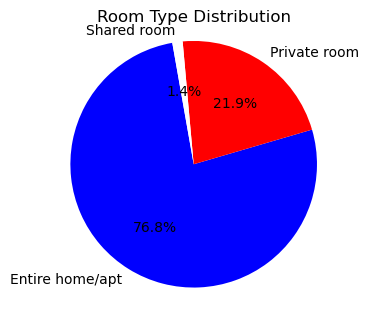

In [31]:
room_type_counts = paris['room_type'].value_counts()

plt.figure(figsize=(3.5, 3.5))
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', startangle=100, colors=['blue', 'red', 'white'])
plt.title('Room Type Distribution')
plt.axis('equal')  
plt.show()


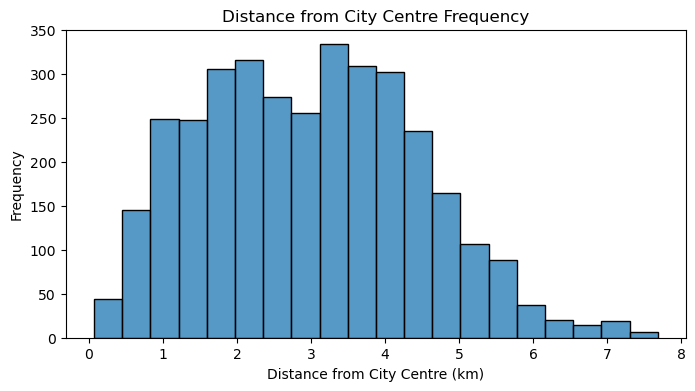

In [14]:
plt.figure(figsize=(8, 4))
sns.histplot(paris['dist'], bins=20, kde=False)
plt.title('Distance from City Centre Frequency')
plt.xlabel('Distance from City Centre (km)')
plt.ylabel('Frequency')
plt.show()

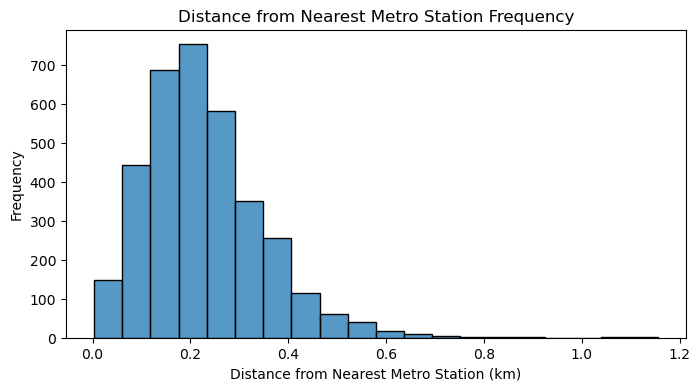

In [15]:
plt.figure(figsize=(8, 4))
sns.histplot(paris['metro_dist'], bins=20, kde=False)
plt.title('Distance from Nearest Metro Station Frequency')
plt.xlabel('Distance from Nearest Metro Station (km)')
plt.ylabel('Frequency')
plt.show()


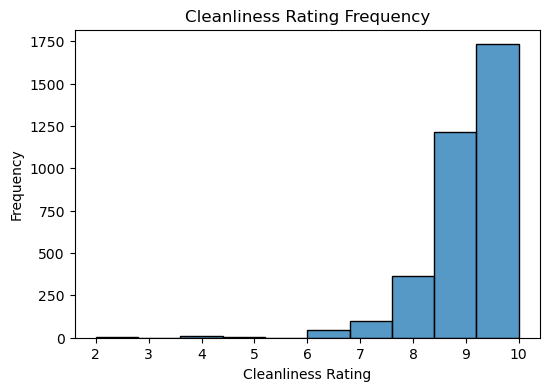

In [16]:
plt.figure(figsize=(6, 4))
sns.histplot(paris['cleanliness_rating'], bins=10, kde=False)
plt.title('Cleanliness Rating Frequency')
plt.xlabel('Cleanliness Rating')
plt.ylabel('Frequency')
plt.show()

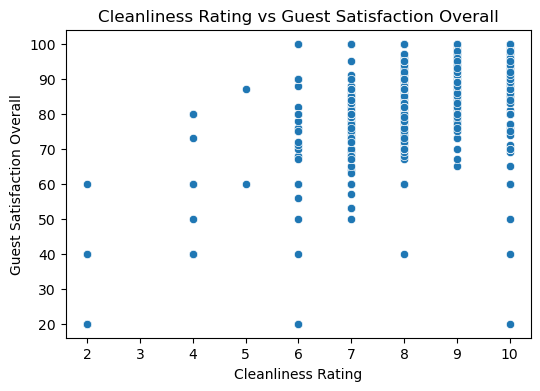

In [17]:
correlation = paris['cleanliness_rating'].corr(paris['guest_satisfaction_overall'])
plt.figure(figsize=(6, 4))
sns.scatterplot(x='cleanliness_rating', y='guest_satisfaction_overall', data=paris)
plt.title('Cleanliness Rating vs Guest Satisfaction Overall')
plt.xlabel('Cleanliness Rating')
plt.ylabel('Guest Satisfaction Overall')
plt.show()

-0.04546567881775365


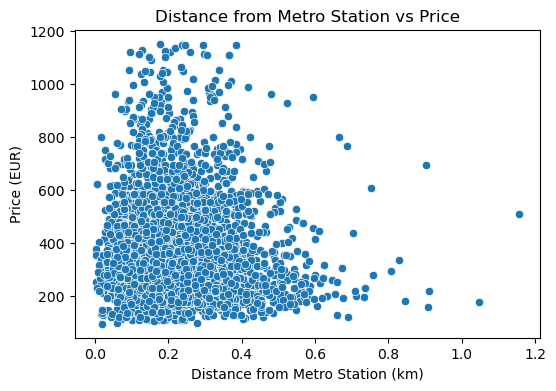

In [18]:
metro_price = paris['metro_dist'].corr(paris['realSum'])
print(metro_price)

plt.figure(figsize=(6, 4))
sns.scatterplot(x='metro_dist', y='realSum', data=paris)
plt.title('Distance from Metro Station vs Price')
plt.xlabel('Distance from Metro Station (km)')
plt.ylabel('Price (EUR)')
plt.show()

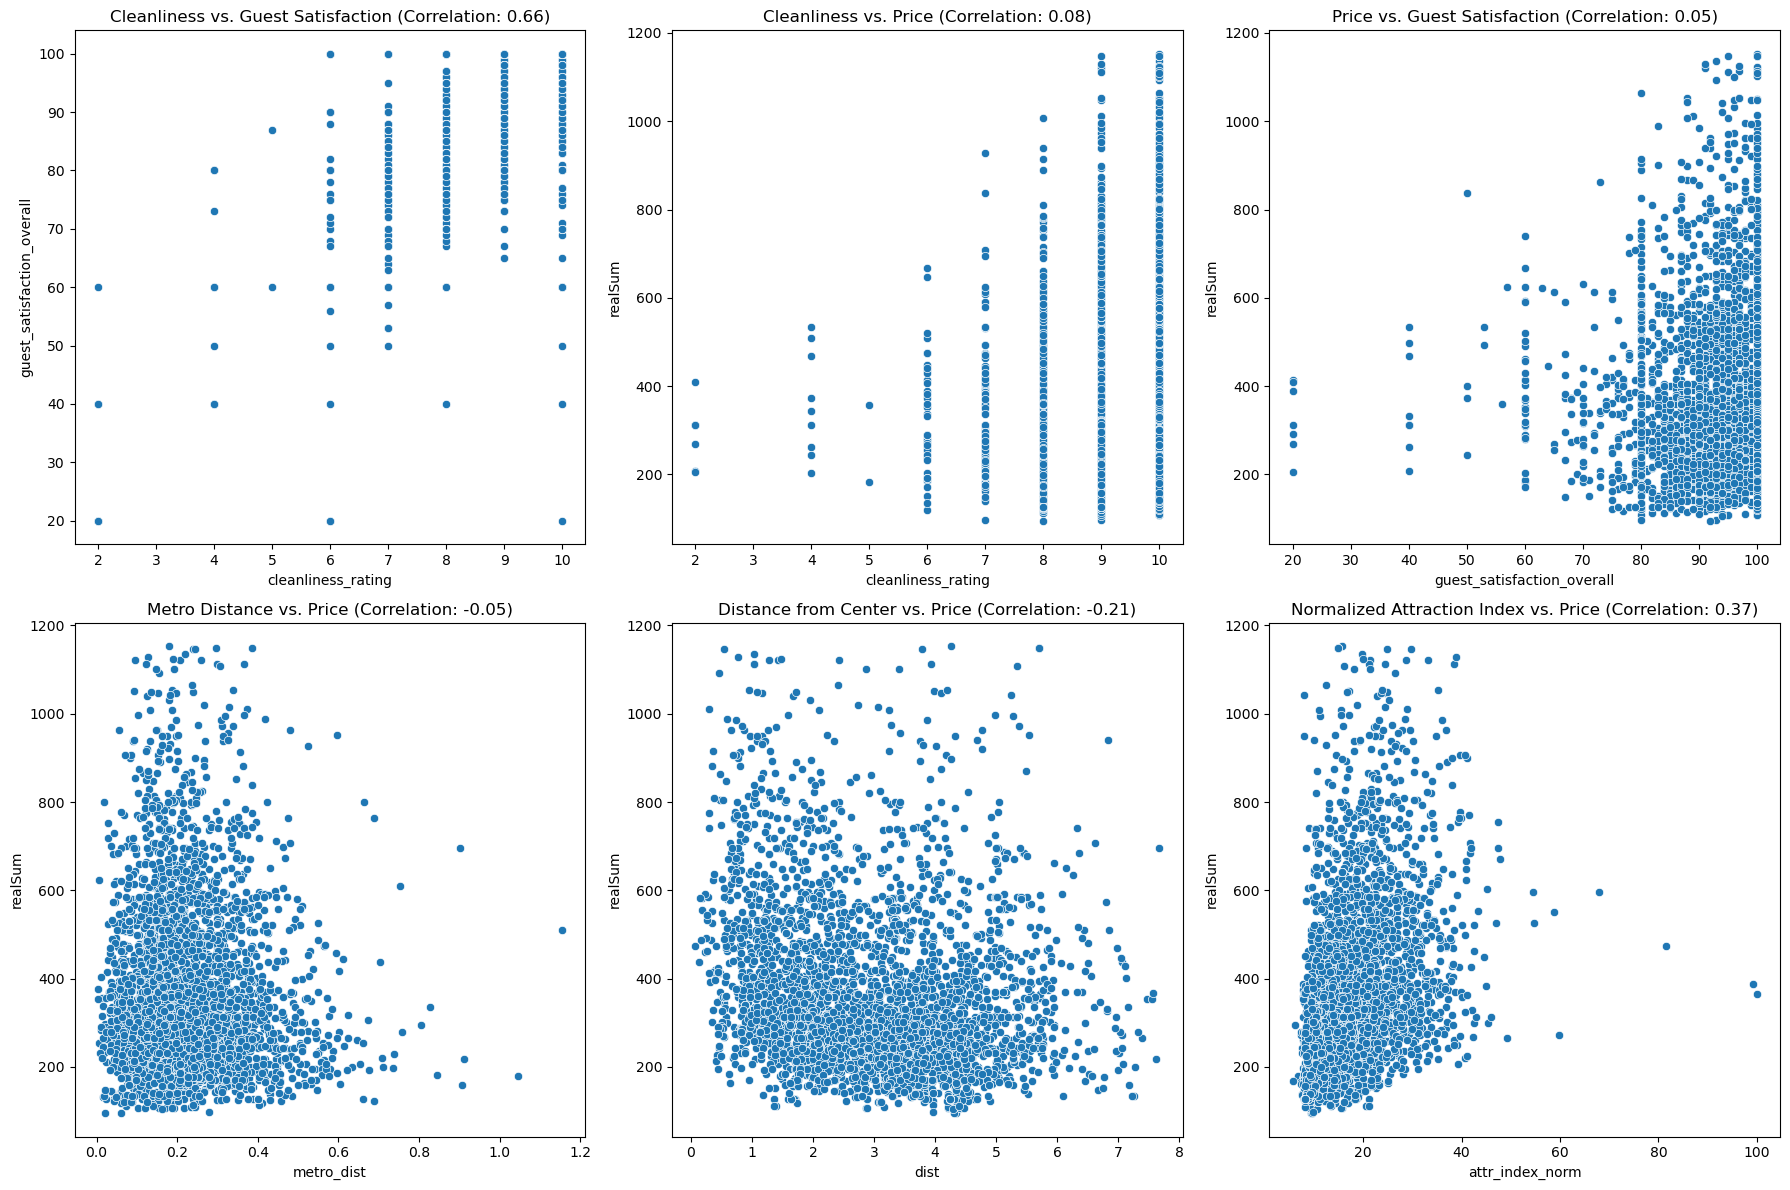

In [19]:
correlation_cleanliness_guest = paris['cleanliness_rating'].corr(paris['guest_satisfaction_overall'])
correlation_cleanliness_price = paris['cleanliness_rating'].corr(paris['realSum'])
correlation_price_guest = paris['realSum'].corr(paris['guest_satisfaction_overall'])
correlation_metro_price = paris['metro_dist'].corr(paris['realSum'])
correlation_price_dist = paris['dist'].corr(paris['realSum'])
correlation_price_attr = paris['attr_index_norm'].corr(paris['realSum'])

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

sns.scatterplot(x='cleanliness_rating', y='guest_satisfaction_overall', data=paris, ax=axes[0, 0])
axes[0, 0].set_title('Cleanliness vs. Guest Satisfaction (Correlation: {:.2f})'.format(correlation_cleanliness_guest))

sns.scatterplot(x='cleanliness_rating', y='realSum', data=paris, ax=axes[0, 1])
axes[0, 1].set_title('Cleanliness vs. Price (Correlation: {:.2f})'.format(correlation_cleanliness_price))

sns.scatterplot(y='realSum', x='guest_satisfaction_overall', data=paris, ax=axes[0, 2])
axes[0, 2].set_title('Price vs. Guest Satisfaction (Correlation: {:.2f})'.format(correlation_price_guest))

sns.scatterplot(x='metro_dist', y='realSum', data=paris, ax=axes[1, 0])
axes[1, 0].set_title('Metro Distance vs. Price (Correlation: {:.2f})'.format(correlation_metro_price))

sns.scatterplot(x='dist', y='realSum', data=paris, ax=axes[1, 1])
axes[1, 1].set_title('Distance from Center vs. Price (Correlation: {:.2f})'.format(correlation_price_dist))

sns.scatterplot(x='attr_index_norm', y='realSum', data=paris, ax=axes[1, 2])
axes[1, 2].set_title('Normalized Attraction Index vs. Price (Correlation: {:.2f})'.format(correlation_price_attr))

plt.tight_layout()
plt.show()


### How do the cheapest and most expensive rooms look like?

In [20]:
cheapest_index = paris['realSum'].idxmin()
cheapest_room = paris.loc[cheapest_index]

most_expensive_index = paris['realSum'].idxmax()
most_expensive_room = paris.loc[most_expensive_index]

print("Cheapest Room Details:")
print(cheapest_room)
print("\nMost Expensive Room Details:")
print(most_expensive_room)

Cheapest Room Details:
Unnamed: 0                           2184
realSum                         95.302451
room_type                     Shared room
room_shared                          True
room_private                        False
person_capacity                       6.0
host_is_superhost                   False
cleanliness_rating                    8.0
guest_satisfaction_overall           92.0
bedrooms                                1
dist                             4.306587
metro_dist                       0.020269
attr_index                     195.001459
attr_index_norm                   9.48196
rest_index                      455.50818
rest_index_norm                 21.013654
lng                               2.37703
lat                              48.89184
Name: 2184, dtype: object

Most Expensive Room Details:
Unnamed: 0                               3061
realSum                           1152.949949
room_type                     Entire home/apt
room_shared                